###### 注释
具体就是在执行过‘重新·训练自己的模型/retrain.bat之后’，再利用训练好的模型进行自己定义类别数目的图像识别。

In [1]:
import tensorflow as tf
import os
os.chdir('重新训练自己的图像识别模型')
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

test_images/animal1.jpg


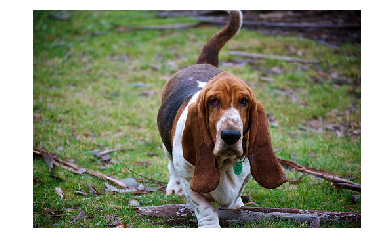

animal's prob is 0.4479704201221466
plane's prob is 0.19710643589496613
flower's prob is 0.1358979493379593
house's prob is 0.11238694190979004
guitar's prob is 0.10663829743862152
test_images/animal2.jpg


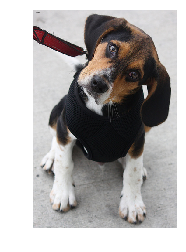

animal's prob is 0.5602279901504517
plane's prob is 0.1594322919845581
flower's prob is 0.13663698732852936
house's prob is 0.07538383454084396
guitar's prob is 0.0683189257979393
test_images/animal3.jpg


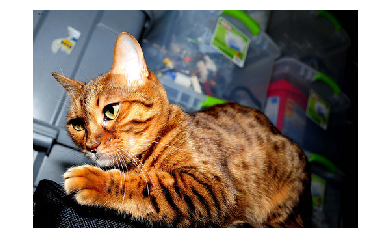

animal's prob is 0.9031237363815308
plane's prob is 0.03001791052520275
flower's prob is 0.02993481233716011
guitar's prob is 0.01855521835386753
house's prob is 0.018368279561400414
test_images/flower1.jpg


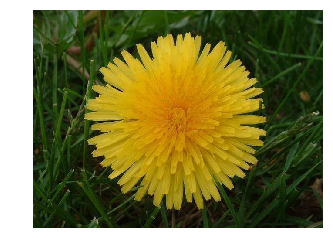

flower's prob is 0.9886560440063477
animal's prob is 0.0039537944830954075
plane's prob is 0.0029657231643795967
house's prob is 0.0027658729813992977
guitar's prob is 0.0016585642006248236
test_images/flower2.jpg


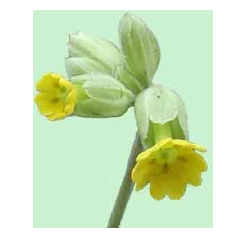

flower's prob is 0.9845137000083923
house's prob is 0.005481276661157608
animal's prob is 0.004078454338014126
plane's prob is 0.0032441068906337023
guitar's prob is 0.002682334277778864
test_images/flower3.jpg


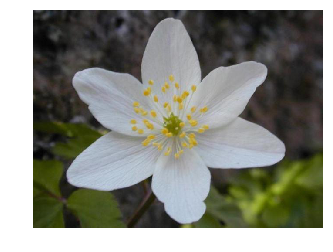

flower's prob is 0.9859640598297119
animal's prob is 0.003980468492954969
house's prob is 0.003604286815971136
guitar's prob is 0.0033086438197642565
plane's prob is 0.0031426178757101297
test_images/guitar1.jpg


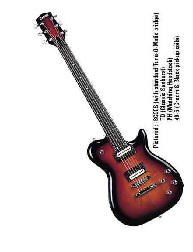

guitar's prob is 0.9720776081085205
animal's prob is 0.0085506122559309
flower's prob is 0.0072629377245903015
house's prob is 0.006074109114706516
plane's prob is 0.006034704856574535
test_images/guitar2.jpg


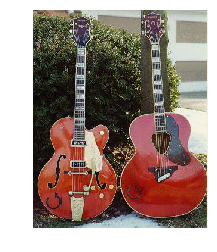

guitar's prob is 0.9720885753631592
animal's prob is 0.008107805624604225
flower's prob is 0.007981345057487488
plane's prob is 0.006126574706286192
house's prob is 0.005695744417607784
test_images/guitar3.jpg


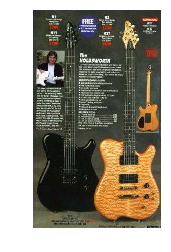

guitar's prob is 0.9866387844085693
house's prob is 0.003939577378332615
flower's prob is 0.0033439781982451677
animal's prob is 0.0033427777234464884
plane's prob is 0.0027349006850272417
test_images/house1.jpg


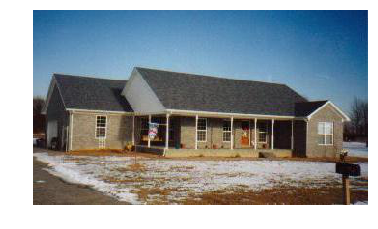

house's prob is 0.9327320456504822
flower's prob is 0.025347791612148285
animal's prob is 0.020057568326592445
plane's prob is 0.013397706672549248
guitar's prob is 0.008464873768389225
test_images/house2.jpg


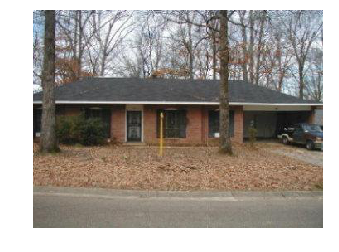

house's prob is 0.9878749251365662
animal's prob is 0.004780525807291269
flower's prob is 0.002939236583188176
plane's prob is 0.0029211260844022036
guitar's prob is 0.0014842484379187226
test_images/house3.jpg


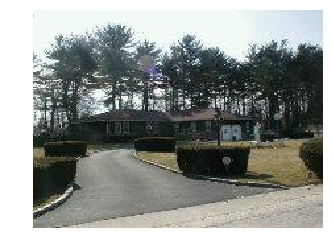

house's prob is 0.9399918913841248
plane's prob is 0.017758363857865334
flower's prob is 0.016387026757001877
animal's prob is 0.015179425477981567
guitar's prob is 0.010683253407478333
test_images/plane1.jpg


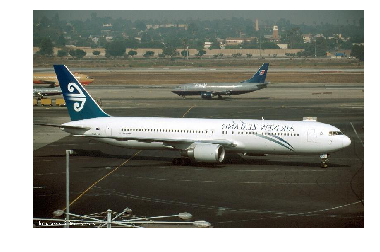

plane's prob is 0.9607751965522766
animal's prob is 0.016202617436647415
guitar's prob is 0.008516563102602959
house's prob is 0.007305609993636608
flower's prob is 0.007199960760772228
test_images/plane2.jpg


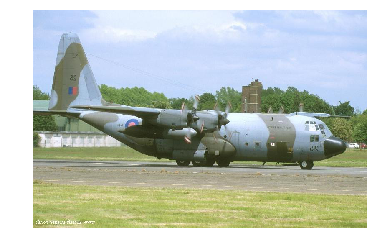

plane's prob is 0.8839017152786255
animal's prob is 0.044482480734586716
flower's prob is 0.030092433094978333
guitar's prob is 0.02135300450026989
house's prob is 0.020170409232378006
test_images/plane3.jpg


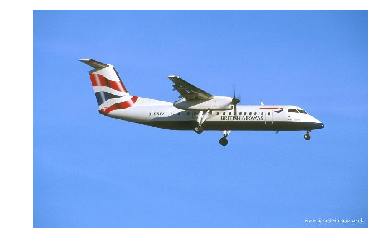

plane's prob is 0.9779290556907654
animal's prob is 0.008871190249919891
house's prob is 0.0046040271408855915
flower's prob is 0.004456896334886551
guitar's prob is 0.004138869699090719


In [5]:
lines = tf.gfile.GFile('output_labels.txt').readlines()
uid_to_labels = {}
for uid,line in enumerate(lines):
    line = line.strip('\n')
    uid_to_labels[uid] = line

def id_to_label(node_id):
    if node_id not in uid_to_labels:
        return 'None'
    return uid_to_labels[node_id]
    
with open('output_graph.pb', 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    tf.import_graph_def(graph_def, name='')

with tf.Session() as sess:
    softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')    # final_result为retrain.py中重新定义的名字
    for root,dirs,files in os.walk('test_images/'):
        for file in files:
            image_data = tf.gfile.GFile(os.path.join(root,file), 'rb').read()
            # 把图像数据传入模型并得到结果
            preds = sess.run(softmax_tensor, {'DecodeJpeg/contents:0':image_data})
            preds = np.squeeze(preds)
            image_path = os.path.join(root,file)
            print(image_path)
            image = Image.open(image_path)
            plt.imshow(image)
            plt.axis('off')
            plt.show()
            
            # 排序
            top_k = preds.argsort()[::-1]
            for node_id in top_k:
                labeli = id_to_label(node_id)
                prob = preds[node_id]
                print("{}'s prob is {}".format(labeli,prob))